### The call-center.xlsx file contains data from a certain call-center. A manager needs to determine what time of day is the best for making calls. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
df = pd.read_excel('./Copy of call-center.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5221 non-null   float64       
 1   phone_num          5221 non-null   float64       
 2   call_type          5221 non-null   object        
 3   staff_id           5221 non-null   float64       
 4   date               5221 non-null   datetime64[ns]
 5   start_time         5221 non-null   object        
 6   handle_time        5221 non-null   float64       
 7   Total_Client_Time  5221 non-null   float64       
 8   Abandon_Time       5221 non-null   float64       
 9   abandon            5221 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 408.0+ KB


In [3]:
df

,id,phone_num,call_type,staff_id,date,start_time,handle_time,Total_Client_Time,Abandon_Time,abandon
0,1.979879e+11,6.696727e+11,Outcoming,19561043.0,2019-06-12,08:30:14,85.0,85.0,0.0,N
1,1.979879e+11,6.686688e+11,Outcoming,19561043.0,2019-06-12,08:32:53,47.0,47.0,0.0,N
2,1.979879e+11,6.696966e+11,Outcoming,19561043.0,2019-06-12,08:34:38,84.0,84.0,0.0,N
3,1.979879e+11,6.692967e+11,Outcoming,20158124.0,2019-06-12,08:36:20,54.0,54.0,0.0,N
4,1.979879e+11,6.692649e+11,Outcoming,19406986.0,2019-06-12,08:36:56,4.0,4.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...
5216,1.978572e+11,6.678092e+11,Outcoming,15331671.0,2019-06-16,17:49:20,2.0,2.0,0.0,N
5217,1.978572e+11,6.696256e+11,Outcoming,15331671.0,2019-06-16,17:49:45,50.0,50.0,0.0,N
5218,1.978572e+11,6.692796e+11,Outcoming,15331671.0,2019-06-16,17:53:57,2.0,2.0,0.0,N
5219,1.978572e+11,6.692070e+11,Outcoming,15331671.0,2019-06-16,17:54:25,12.0,12.0,0.0,N


In [4]:
# merge the "date" and "start_time" columns to later extract information based on it 
df['date'] = df['date'].astype(str) 
df['start_time'] = df['start_time'].astype(str)
df['date_time'] = df['date'] + ' ' + df['start_time']
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df

,id,phone_num,call_type,staff_id,date,start_time,handle_time,Total_Client_Time,Abandon_Time,abandon,date_time,hour
0,1.979879e+11,6.696727e+11,Outcoming,19561043.0,2019-06-12,08:30:14,85.0,85.0,0.0,N,2019-06-12 08:30:14,8
1,1.979879e+11,6.686688e+11,Outcoming,19561043.0,2019-06-12,08:32:53,47.0,47.0,0.0,N,2019-06-12 08:32:53,8
2,1.979879e+11,6.696966e+11,Outcoming,19561043.0,2019-06-12,08:34:38,84.0,84.0,0.0,N,2019-06-12 08:34:38,8
3,1.979879e+11,6.692967e+11,Outcoming,20158124.0,2019-06-12,08:36:20,54.0,54.0,0.0,N,2019-06-12 08:36:20,8
4,1.979879e+11,6.692649e+11,Outcoming,19406986.0,2019-06-12,08:36:56,4.0,4.0,0.0,N,2019-06-12 08:36:56,8
...,...,...,...,...,...,...,...,...,...,...,...,...
5216,1.978572e+11,6.678092e+11,Outcoming,15331671.0,2019-06-16,17:49:20,2.0,2.0,0.0,N,2019-06-16 17:49:20,17
5217,1.978572e+11,6.696256e+11,Outcoming,15331671.0,2019-06-16,17:49:45,50.0,50.0,0.0,N,2019-06-16 17:49:45,17
5218,1.978572e+11,6.692796e+11,Outcoming,15331671.0,2019-06-16,17:53:57,2.0,2.0,0.0,N,2019-06-16 17:53:57,17
5219,1.978572e+11,6.692070e+11,Outcoming,15331671.0,2019-06-16,17:54:25,12.0,12.0,0.0,N,2019-06-16 17:54:25,17


In [5]:
#since the manager is interested in making calls, and the "call type" column contains oucoming and incoming calls 
df['call_type'].value_counts()

Outcoming    5179
Incoming       42
Name: call_type, dtype: int64

In [6]:
#select only outcoming ones
df_outcoming = df.loc[df['call_type']=='Outcoming'] 
df_outcoming['call_type'].describe()

count          5179
unique            1
top       Outcoming
freq           5179
Name: call_type, dtype: object

### At what hour are the most calls made?
At first I decided to analyze how many calls are made at particular hours during the day.

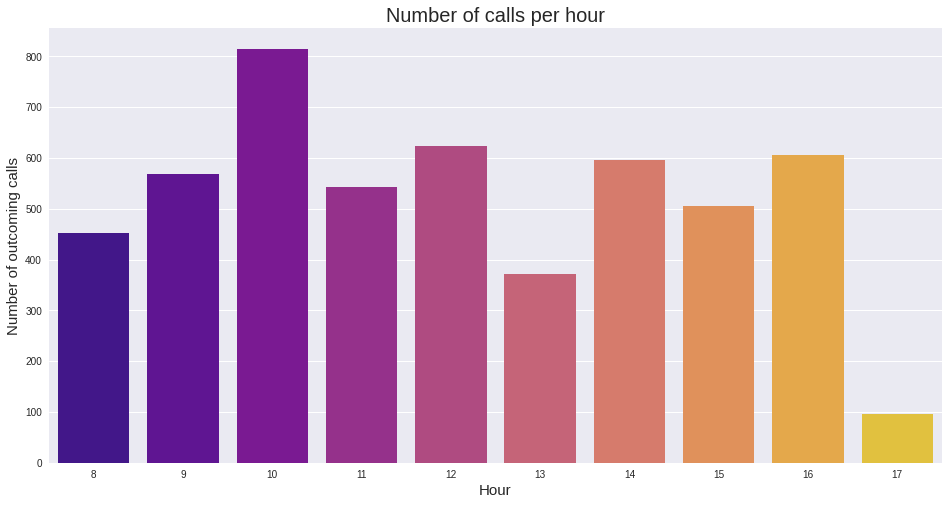

In [7]:
calls_by_hour = df_outcoming.copy()
calls_by_hour = calls_by_hour.groupby(['hour']).count()
calls_by_hour = calls_by_hour.reset_index()
sns.barplot(x='hour',y='Total_Client_Time',data=calls_by_hour, palette ='plasma')
plt.title('Number of calls per hour', fontsize=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of outcoming calls", size=15)
plt.show()

As you can see in the above chart, the most calls were made at 10 o'clock, followed by 12, 14, 16, 9 and 11 o'clock - their number seems to be similar. The least number of calls was made at 5 p.m. However, to gather more information I will still check the time of calls by hour. In the dataset there are two columns "handle_time" and "Total_client_time", but summing up both by  `describe` it turns out that there is no difference between them, so I will use the "Total_client_time" column for further analysis. The `value_count` of the value "Abandon" in the "Outcoming" column does not indicate that any call was terminated before the actual conversation, but this probably only applies to incoming calls.

In [8]:
df_outcoming[['handle_time ', 'Total_Client_Time']].describe()

,handle_time,Total_Client_Time
count,5179.000000,5179.000000
mean,58.525005,58.525005
std,97.903391,97.903391
min,0.000000,0.000000
25%,9.000000,9.000000
50%,36.000000,36.000000
75%,64.000000,64.000000
max,1447.000000,1447.000000


In [9]:
df_outcoming['abandon'].value_counts()

N    5179
Name: abandon, dtype: int64

### Average time of calls by hour

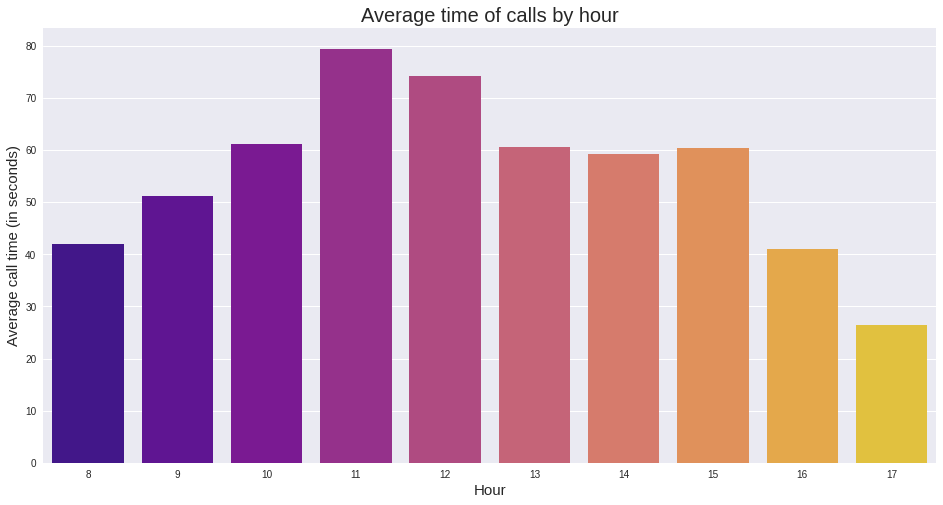

In [10]:
total_client_time_by_hour = df_outcoming.copy()
total_client_time_by_hour = total_client_time_by_hour.groupby(['hour'])['Total_Client_Time'].mean()
total_client_time_by_hour = total_client_time_by_hour.reset_index()
sns.barplot(x='hour',y='Total_Client_Time',data=total_client_time_by_hour, palette ='plasma')
plt.title('Average time of calls by hour', fontsize=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Average call time (in seconds)", size=15)
plt.show()

In [11]:
total_client_time_by_hour.sort_values(by='Total_Client_Time', ascending=False )

,hour,Total_Client_Time
3,11,79.464088
4,12,74.219904
2,10,61.138650
5,13,60.591398
7,15,60.312253
6,14,59.328859
1,9,51.107206
0,8,41.940397
8,16,40.995050
9,17,26.510417


Comparing the average call length (in seconds) for specific hours, it comes out that, on average, the longest calls were made at 11 am. and 12pm. - 79.5 and 74 seconds, respectively. For other hours the time was similar. The shortest conversations were made at 5pm.<br>

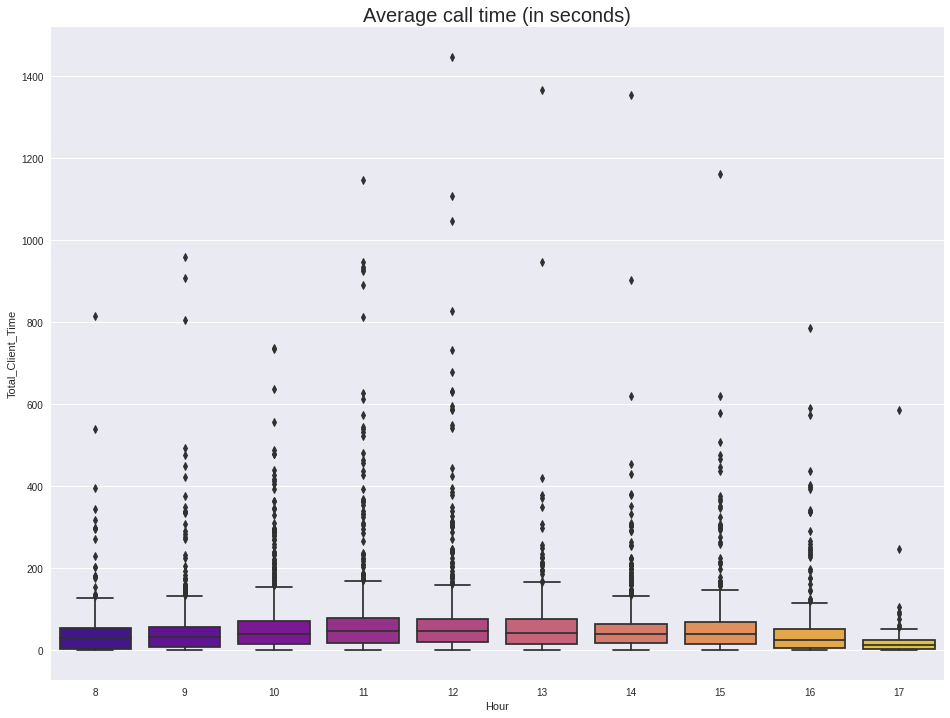

In [12]:
#plot a boxplot for each hour
plt.figure(figsize=(16, 12))
sns.boxplot(x='hour', y='Total_Client_Time', data=df, palette='plasma')
plt.xlabel('Hour')
plt.title("Average call time (in seconds)", size=20)
plt.show()

From the above chart with boxplots for each hour we can say that the averages call time between 10 am and 1 pm do not seem to differ. 
However, in order to see if this average call time differs between the groups we will perform ANOVA test.

In [13]:
hours = np.arange(8,18,1)

In [14]:
#make hour for each hour
hour_8 = df_outcoming.loc[df_outcoming['hour']==8, "Total_Client_Time"]
hour_9 = df_outcoming.loc[df_outcoming['hour']==9, "Total_Client_Time"]
hour_10 = df_outcoming.loc[df_outcoming['hour']==10, "Total_Client_Time"]
hour_11 = df_outcoming.loc[df_outcoming['hour']==11, "Total_Client_Time"]
hour_12 = df_outcoming.loc[df_outcoming['hour']==12, "Total_Client_Time"]
hour_13 = df_outcoming.loc[df_outcoming['hour']==13, "Total_Client_Time"]
hour_14 = df_outcoming.loc[df_outcoming['hour']==14, "Total_Client_Time"]
hour_15 = df_outcoming.loc[df_outcoming['hour']==15, "Total_Client_Time"]
hour_16 = df_outcoming.loc[df_outcoming['hour']==16, "Total_Client_Time"]
hour_17 = df_outcoming.loc[df_outcoming['hour']==17, "Total_Client_Time"]

In [15]:
#perform ANOVA test for the groups
alpha = 0.05
f, p = stats.f_oneway(hour_8,hour_9,hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17)

if p > alpha:
    print('There is no difference among group means.')
else:
    print('At least one group mean is different from the others')
print('stat:',f, 'p-value:',p)

At least one group mean is different from the others
stat: 9.902385509161778 p-value: 3.373965801757094e-15


The ANOVA test result indicates that at least one average is different from the other, but in order to determine which hour is the best for making calls I performed Tukey test in R and here are the results:
The best hour for making calls is 11 a.m., the next best hour is 12 p.m., followed by 1 and 3 p.m. The worst hour for calls turned out to be 4 and 5 p.m.